In [1]:
import numpy as np
import json
import os
import sys
from sympy import sympify
import re
import copy
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, "../src/utils/")
from agent import Environment
from text2equation import resolve_equations
from Q_learning import QLearningTrainer
from itertools import product
import random
from text2equation import resolve_equations
agent = Environment("rocket.json")
RL = QLearningTrainer(agent, num_episodes = 110, decay_type = "exponential", convergence_criterion = 0.01, decrease_prob_exp = 0.01)

# Lets see how system evolves

Before to start training, a premilary work must be done on reward function. Indeed, we have 2 agents. Each one has an impact on rocket trajectory. Lets simulate a simple case. Our rocket start with no spped. The only force applied on it is G. The rocket falls down straight on the planetoid (angle is zero no needs to correct it) and without friction. We start booster engine when we are close to the ground. 

In [2]:
RL.reinitialize()
flag = "0"
actions ={"action_booster" : []} 
for i in range(40):    
    RL.env.step([flag, "1"])
    actions["action_booster"].append(flag)
    if RL.env.futur_pos_y[-1] <= 0:
        # RL.env.delete_last_states(end_index = -2)
        flag ="2"
# save result 
df_traj = pd.concat([pd.DataFrame(RL.env.all_states()), pd.DataFrame(actions)], axis = 1)
#Normalize data and plot it
df_traj.head()

,acceleration_x,acceleration_y,speed_x,speed_y,m_carburant,pos_x,pos_y,angle,booster,alpha,futur_pos_y,max_speed,m_carburant_ini,action_booster
0,0.0,0.00,0.0,0.00,100.0,100.0,200.000,0.0,0.0,0.0,0.000,0.0,100.0,0
1,0.0,-1.62,0.0,-0.81,100.0,100.0,199.595,0.0,0.0,0.0,197.165,0.0,100.0,0
2,0.0,-1.62,0.0,-1.62,100.0,100.0,198.785,0.0,0.0,0.0,193.925,0.0,100.0,0
3,0.0,-1.62,0.0,-2.43,100.0,100.0,197.570,0.0,0.0,0.0,190.280,0.0,100.0,0
4,0.0,-1.62,0.0,-3.24,100.0,100.0,195.950,0.0,0.0,0.0,186.230,0.0,100.0,0


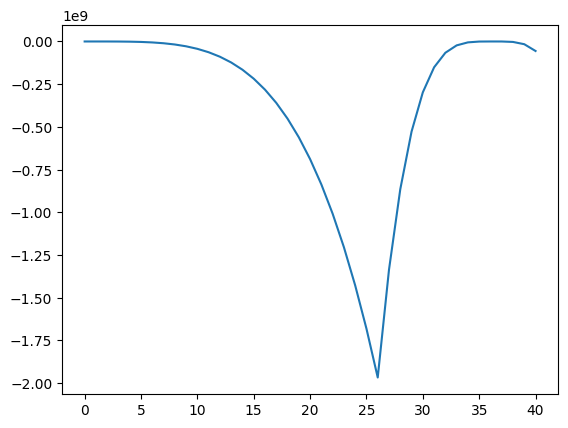

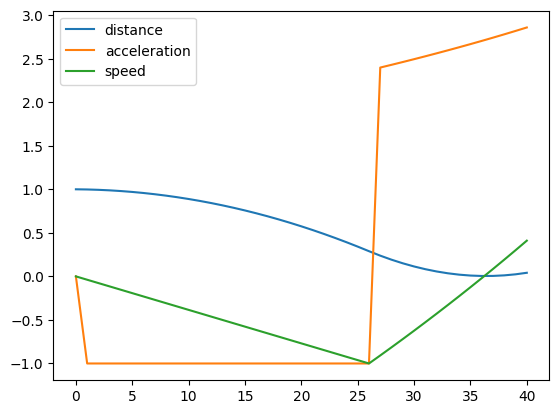

In [3]:
plt.plot(pd.DataFrame(RL.env.rewards)["booster"])
plt.show()
plt.plot(df_traj[["pos_y"]] /df_traj[["pos_y"]].max(), label ="distance")
plt.plot(df_traj[["acceleration_y"]] /1.62, label ="acceleration")
plt.plot(df_traj[["speed_y"]] /df_traj[["speed_y"]].abs().max(), label ="speed")
plt.legend()
plt.show()

In [ ]:
RL.env.json["states_variables"]

In [ ]:
QTABLE.loc[ [str(state)] ]

In [ ]:
QTABLE = copy.deepcopy(RL.q_table)
agent = Environment("rocket.json")
state = agent.state_for_q_table()
done = False
cpt = 0
limit = 20
replace_zero = True
action = [QTABLE.loc[ [str(state)], [key] ].to_numpy().argmax() for key in agent.action_space.keys()]



In [ ]:
action

In [ ]:
QTABLE = copy.deepcopy(RL.q_table)
agent.reset()
state = agent.state_for_q_table()
done = False
cpt = 0
limit = 20
replace_zero = True
if replace_zero:
    q_table = QTABLE.replace(0, np.nan)
else:
    q_table = QTABLE.copy()
while not done:
    action = [QTABLE.loc[ [str(state)], [key] ].to_numpy().argmax() for key in agent.action_space.keys()]
    if not isinstance(action, list):
        action = [action]
    # print("target variable ({0}): {1:.2f}".format(self.env.target_variable, self.env.frame.last_state()[self.env.target_variable][0]))
    # print("action :", action[0])
    _, _, _, _, _ = agent.step(action)
    state = agent.state_for_q_table()
    cpt += 1
    if cpt == limit:
        done = True


In [ ]:
RL.env.futur_pos_y

In [ ]:
RL.env.pos_y

In [ ]:
RL.env.speed_y

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
from itertools import count
import random

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  

fig, ax = plt.subplots()
x_value = []
y_value = []
index = count();
def animate(t):
    x_value.append(next(index))
    y_value.append(random.randint(0,10))
    ax.cla()
    ax.plot(x_value,y_value)
    ax.set_xlim(0,10)

matplotlib.animation.FuncAnimation(fig, animate, frames=10, interval = 500)

In [ ]:
RL.q_table_for_all_episodes[0]

In [ ]:
RL.q_table

In [ ]:
actions

In [ ]:
RL.env.json["equations_variables"]

In [ ]:
RL.env.json["initial_values"]

# modélisation de la chute libre de la rocket

In [ ]:
#reset value to initial state
RL.reinitialize()
while RL.env.last_state()["position_y"][0] > 5:
    RL.env.step(["0"], ["booster"])
    RL.env.last_state()["position_y"]
plt.plot(RL.env.all_states()["position_y"])

# modélisation de la chute libre de la rocket avec booster

In [ ]:
RL.reinitialize()
RL.env.last_state()["vitesse_y"][0]

In [ ]:
RL.reinitialize()
while RL.env.last_state()["vitesse_y"][0] < 5:
    RL.env.step(["1"], ["booster"])
    RL.env.last_state()["position_y"]

# modélisation d'une métric quadratique

In [ ]:
plt.plot(RL.env.all_states()["position_y"]/500)
plt.ylabel("Hateur")
plt.xlabel("Time")
plt.title("Position Y")
plt.show()
plt.plot(RL.env.all_states()["vitesse_y"])
plt.ylabel("Vitesse")
plt.xlabel("Time")
plt.title("Vitesse Y")
plt.show()

In [ ]:
plt.plot(np.square(RL.env.all_states()["vitesse_y"] - 5), RL.env.all_states()["position_y"] -10)

In [ ]:
plt.plot(np.square(RL.env.all_states()["vitesse_y"] - 5))


In [ ]:
RL.q_learning()

In [ ]:
RL.q_table

In [ ]:
RL.env.select_states(5, 10)

In [ ]:
RL.env.last_state()

In [ ]:
Environment({'initial_values': {'position_x': [400.0],
  'position_y': [950.0],
  'vitesse_x': [20.0],
  'vitesse_y': [-30.0],
  'angle': [0.3],
  'booster': [0.0]},
 '_limit': ['min', 'max', 'n_bins'],
 'limit': {'position_x': [0.0, 800, 100],
  'position_y': [0.0, 1000.0, 200],
  'vitesse_x': [-50.0, 50.0, 20],
  'vitesse_y': [-50.0, 50.0, 20],
  'angle': [-0.8, 0.8, 17],
  'booster': [0.0, 1.0, 2]},
 'n_action': {'angle': {'0': -0.1, '1': 0.0, '2': 0.1},
  'booster': {'0': 0.0, '1': 1.0}},
 '_action_to_take': 'How action change trigger_variable',
 'action_to_take': {'angle': {'$angle$': '$angle$ + $action$'},
  'booster': {'$booster$': '$action$'}},
 'states_variables': ['position_x',
  'position_y',
  'vitesse_x',
  'vitesse_y',
  'angle'],
 'trigger_variables': ['angle', 'booster'],
 'equations_variables': {'$time_step$': '0.1',
  '$g$': '9.81',
  '$acceleration_x$': '$g$ * cos($angle$)',
  '$acceleration_y$': '$g$ * sin($angle$)',
  '$vitesse_x$': '$vitesse_x$ + $booster$ * 5.0 * cos($angle$)',
  '$vitesse_y$': '$vitesse_y$ + $booster$ * 5.0 * sin($angle$)',
  '$position_x$': '$position_x$ + $vitesse_x$ * $time_step$ + 0.5 * $acceleration_x$ * $time_step$^2',
  '$position_y$': '$position_y$ + $vitesse_y$ * $time_step$ + 0.5 * $acceleration_y$ * $time_step$^2'},
 'equations_rewards': {'$angle$': '-($angle$ * 10)^2 - abs($vitesse_x$) -1 * abs($position_x$ - 200)/10',
  '$booster$': '-($position_y$ - 5)^2 - abs($vitesse_y)$'}})

In [ ]:
features_values = {'x': np.array([4.0]),
 'a': np.array([-1.0]),
 'c': np.array([6])}

list_equations = {'$z$' : '$a$ * $x$^2 + $x$ + $c$'}

result = resolve_equations(features_values, list_equations)
result

In [ ]:
result.keys()

In [ ]:
features_values =agent.all_states()
list_equations = agent.json['equations_variables']
delimeter = "$"
solved_values = {}
for term, equation in list_equations.items():
    # convert string to SymPy expressions
    expr = sympify(equation.replace(delimeter, ''))
    # flag "subs": take a dictionary of Sylmbol: point pairs.
    # check we get goot format
    if all([isinstance(value, np.ndarray) for key, value in features_values.items()]):
        solved_values[term.replace(delimeter, '')] = np.array([float(
                sympify(expr).evalf(
                    subs={
                        key: value.item() for key, value in features_values.items()
                        }
                )
            )])
    elif all([isinstance(value, list) for key, value in features_values.items()]):
        solved_values[term.replace(delimeter, '')] = np.array([float(
                sympify(expr).evalf(
                    subs={
                        key: np.array(value).item() for key, value in features_values.items()
                        }
                )
            )])
    else:
        solved_values[term.replace(delimeter, '')] = np.array([float(
                sympify(expr).evalf(
                    subs={
                        key: value for key, value in features_values.items()
                        }
                )
            )])
    features_values[term.replace('$', '')] = np.array(
        [solved_values[term.replace('$', '')]]
        ).flatten()

In [ ]:
{
                        key: np.array(value).item() for key, value in features_values.items()
                        }

In [ ]:
RL = QLearningTrainer(agent)

In [ ]:
RL.q_table = RL.global_q_tables()
RL.q_table_old = RL.global_q_tables()
probas = RL.give_epsilon()
for episode in range(RL.num_episodes):
    print("Episode {0}/{1}".format(episode+1, RL.num_episodes))
    print("exploration_prob : {0:.3f}".format(probas[episode]))
    proba = probas[episode]
    #current_iter = self.training_q_learning(proba[episode])
    ########################################################
    RL.env.reset()
    states, done, current_iter, iter_out_of_bound = RL.reset_envrionement_multi_agent()
    while not any(done):
        # Choose actions for each agent based on the global policy
        # proba = np.max([self.min_prob, self.max_prob])
        actions = RL.call_choose_action(states, proba)
        # compute new states according to agents's action
        next_env, rewards, done, problem, info = RL.env.step(actions, RL.env.trigger_variables)
        if any(problem):
        # boundaries limit. Attempt to correct it
            # print("{0}th: boundaries limit. Attempt to correct it".format(current_iter))
            # print(next_env["U1"].env.last_state())
            next_env, rewards, done, problem, info, actions = RL.check_bound(problem,
                                                                    next_env,
                                                                    RL.env.action_space,
                                                                    rewards,
                                                                    done,
                                                                    info,
                                                                    actions)
            if any(done):
                # still out of bound stop episode
                # print("stop episode ! System is out of bound. Attempt to correct it, failed")
                # delete last element only if we get one trigger variable
                if len(RL.env.trigger_variables) == 1:
                    RL.env.delete_last_state()
                continue
        # Update Q-values bsssased on the Q-learning update rule.
        #   env.action_space.keys() -> dict_keys(['X', 'B', 'D'])
        #   actions -> [0, 1, 1]
        for trigger_variable, action in zip(RL.env.action_space.keys() , actions):
            new_row = RL.global_q_tables(next_env[trigger_variable])
            # check if next states is present in dataFrame
            if not new_row.index.to_list()[0] in RL.q_table.index.to_list():
                RL.q_table = pd.concat([RL.q_table, new_row])
            RL.update_q_values(trigger_variable,
                str(states[trigger_variable]),
                str(next_env[trigger_variable].state_for_q_table()),
                str(action),
                sum(rewards[trigger_variable].values()))
        # if we have more than 1 trigger variable
        # next state is choose as state with higher score
        if len(RL.env.trigger_variables) > 1:
            indice = np.where(
                [
                    sum(values.values()) for key, values in rewards.items()
                ] == np.max([
                    sum(values.values()) for key, values in rewards.items()
                ]))[0][0]
            RL.env = next_env[list(next_env.keys())[indice]]
            #  states = {list(next_env.keys())[indice] : self.env.state_for_q_table()}
            states = {key : RL.env.state_for_q_table() for key in next_env.keys()}
        elif len(RL.env.trigger_variables) == 1:
            RL.env = next_env[list(next_env.keys())[0]]
            states = {RL.env.trigger_variables[0] : next_env[list(next_env.keys())[0]].state_for_q_table()}
        else:
            print("Fatal error no keys present")
            sys.exit
        done = [RL.control_loop(current_iter)]
        current_iter  += 1
        RL.q_table_old = RL.q_table.copy()    
    ########################################################
    RL.states_for_all_episodes.append(pd.DataFrame(RL.env.all_states()))
    RL.q_table_for_all_episodes.append(RL.q_table.copy().replace(0, np.nan))
    # self.all_episodes.append(self.q_table.copy())
    ###############################################
    # self.max_prob -= self.decrease_prob_exp
    print("end while loop iteration : ", current_iter)
    RL.monitor_iter.append(current_iter)
    # check if we can stop training early
    # look last 6 episodes and check
    if len(RL.monitor_iter) > 6:
        tmp = np.sum(np.array(RL.monitor_iter[-6:-1]) == np.array(RL.monitor_iter[-5:]))
        if tmp == 5 and current_iter < RL.run_limit -1:
            print("Look like nothing to learn anymore, stop training")
            break
#             return q_table, self.monitor_iter
#replace 0 by nan
RL.q_table.replace(0, np.nan)

In [ ]:
np.linspace(-0.8, 8.0, num=17)

In [ ]:
RL.env.discretized_observation(dico = True)

In [ ]:
# Fonction pour mettre à jour les paramètres de la fusée
def mettre_a_jour_fusee(vitesse, position, angle_inclinaison, boosters_actifs, temps):
    acceleration_x = gravite * np.cos(angle_inclinaison)  # composante horizontale de l'accélération
    acceleration_y = gravite * np.sin(angle_inclinaison)  # composante verticale de l'accélération

    vitesse_x = vitesse[0] + boosters_actifs * 5.0 * np.cos(angle_inclinaison)  # vitesse horizontale avec les boosters
    vitesse_y = vitesse[1] + boosters_actifs * 5.0 * np.sin(angle_inclinaison)  # vitesse verticale avec les boosters

    # Mettre à jour les composantes de la vitesse
    vitesse_x += acceleration_x * temps
    vitesse_y -= acceleration_y * temps  # notez le signe négatif ici en raison de la direction positive vers le haut

    # Mettre à jour les composantes de la position
    position_x = position[0] + vitesse_x * temps + 0.5 * acceleration_x * temps**2
    position_y = position[1] + vitesse_y * temps + 0.5 * acceleration_y * temps**2

    # Variation aléatoire de l'angle des boosters (par exemple, entre -0.1 et 0.1 radians)
    angle_boosters = np.random.uniform(-0.1, 0.1)

    # Mettre à jour l'angle d'inclinaison
    angle_inclinaison += angle_boosters

    return (position_x, position_y), (vitesse_x, vitesse_y), angle_inclinaison, angle_boosters

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paramètres initiaux
gravite = 9.81  # accélération due à la gravité sur Terre (m/s^2)
temps_de_vol = 40  # temps de vol de la fusée (s)
pas_de_temps = 0.1  # intervalle de temps entre les calculs (s)

# Conditions initiales
vitesse_initiale_x = 0.0  # m/s, la fusée démarre du repos
vitesse_initiale_y = -20.0  # m/s, la fusée démarre du repos
position_initiale_x = 0.0  # m, la fusée démarre du sol
position_initiale_y = 900
angle_inclinaison_initiale = 0.0  # angle d'inclinaison initial en radians



# Initialisation des listes pour stocker les données
temps = np.arange(0, temps_de_vol, pas_de_temps)
positions = []
vitesses = []
angles_inclinaison = []

# Conditions initiales
position = (position_initiale_x, 0.0)
vitesse = (vitesse_initiale_x, vitesse_initiale_y)
angle_inclinaison = angle_inclinaison_initiale

# Simulation du mouvement de la fusée
for t in temps:
    boosters_actifs = 1 if t < temps_de_vol / 2 else 0  # Allume les boosters pendant la première moitié du temps de vol
    position, vitesse, angle_inclinaison, _ = mettre_a_jour_fusee(
        vitesse, position, angle_inclinaison, boosters_actifs, pas_de_temps
    )

    positions.append(position)
    vitesses.append(vitesse)
    angles_inclinaison.append(angle_inclinaison)

# Tracé de la trajectoire
positions = np.array(positions)
plt.plot(temps, positions[:, 0], label='Position horizontale')
plt.plot(temps, positions[:, 1], label='Position verticale')
plt.title("Trajectoire d'une fusée avec boosters")
plt.xlabel("Temps (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid(True)
plt.show()

# Tracé de la vitesse et de l'angle d'inclinaison
vitesses = np.array(vitesses)
plt.plot(temps, vitesses[:, 0], label='Vitesse horizontale')
plt.plot(temps, vitesses[:, 1], label='Vitesse verticale')
plt.plot(temps, np.degrees(angles_inclinaison), label="Angle d'inclinaison (degrés)")
plt.title("Vitesse et angle d'inclinaison de la fusée")
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse (m/s) / Angle (degrés)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
RL = QLearningTrainer(agent)

In [ ]:
RL.q_learning()

In [ ]:
RL.q_table